I use [detectorn2](https://github.com/facebookresearch/detectron2) to deal with the faster RCNN

In [1]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
#from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [2]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from matplotlib.pyplot import imshow
from PIL import Image
import IPython
def cv2_imshow(img):
    img = img[:,:,[2,1,0]]
    img = Image.fromarray(img)
    plt.figure(figsize=(20, 20))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    #display(data=img)

In [3]:
import csv
train, test = [],[]
def take_path(x,d):
    with open(d) as t:
        #print(t.read())
        #print(type(csv.reader(t)))
        tmp = csv.reader(t,delimiter=' ')
        for i in tmp:
            x.append(i)
        for ele in x:
            ele[0] = '../PCBData/'+ele[0][:-4]+'_test.jpg'
            ele[1] = '../PCBData/'+ele[1]

take_path(test,'../PCBData/test.txt')
print(test[:5])
take_path(train,'../PCBData/trainval.txt')
print(train[:2])


[['../PCBData/group20085/20085/20085291_test.jpg', '../PCBData/group20085/20085_not/20085291.txt'], ['../PCBData/group20085/20085/20085292_test.jpg', '../PCBData/group20085/20085_not/20085292.txt'], ['../PCBData/group20085/20085/20085293_test.jpg', '../PCBData/group20085/20085_not/20085293.txt'], ['../PCBData/group20085/20085/20085294_test.jpg', '../PCBData/group20085/20085_not/20085294.txt'], ['../PCBData/group20085/20085/20085295_test.jpg', '../PCBData/group20085/20085_not/20085295.txt']]
[['../PCBData/group20085/20085/20085000_test.jpg', '../PCBData/group20085/20085_not/20085000.txt'], ['../PCBData/group20085/20085/20085001_test.jpg', '../PCBData/group20085/20085_not/20085001.txt']]


In [4]:
height, width = cv2.imread('../PCBData/group20085/20085/20085291_test.jpg').shape[:2]
print(height, width)
DatasetCatalog.clear()

640 640


NameError: name 'DatasetCatalog' is not defined

In [11]:
import os
import numpy as np
import json
from detectron2.structures import BoxMode
def get_PCB_dict(data_list):
    dataset_dicts = []
    
    for i,path in enumerate(data_list):
        filename = path[0]
        height, width = cv2.imread(filename).shape[:2]
        record = {}
        record['file_name'] = filename
        record['image_id'] = i
        record['height']= height
        record['width']= width
        
        #for i in data_list[1] to get bbox and category
        objs = []
        with open(path[1]) as t:
            lines = t.readlines()
            for line in lines:
                box = line[:-1].split(' ')
                boxes = list(map(float,[box[0],box[3],box[2],box[1]]))
                category = int(box[4])

                obj = {
                    "bbox": boxes,
                    "bbox_mode": BoxMode.XYXY_ABS,
                    #"segmentation": [poly], To draw a line, along to ballo0n
                    "category_id": category-1,
                    "iscrowd": 0
                }
                objs.append(obj)
            record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts #list of dicts

In [12]:
from detectron2.data import DatasetCatalog, MetadataCatalog
for d,x in [("train",train), ("test",test)]:
    DatasetCatalog.register("PCB_" + d, lambda x=x: get_PCB_dict(x))
    MetadataCatalog.get("PCB_" + d).set(thing_classes=["open", "short", "mousebite", "spur", "copper", "pin-hole"],thing_colors=[(255,0,0),(0,255,0),(0,0,255),(255,255,0),(255,0,255),(0,255,255)])
    #I set the colors, but it's no use. Retry after training.
PCB_metadata = MetadataCatalog.get("PCB_train")

AssertionError: Dataset 'PCB_train' is already registered!

In [13]:
#check dataset
print(type(PCB_metadata))
MetadataCatalog.get("PCB_test")

<class 'detectron2.data.catalog.Metadata'>


Metadata(name='PCB_test', thing_classes=['open', 'short', 'mousebite', 'spur', 'copper', 'pin-hole'], thing_colors=[(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (255, 0, 255), (0, 255, 255)])

In [14]:
dataset_dicts = get_PCB_dict(train)

In [15]:
print(dataset_dicts[0])
print(dataset_dicts[1])

{'file_name': '../PCBData/group20085/20085/20085000_test.jpg', 'image_id': 0, 'height': 640, 'width': 640, 'annotations': [{'bbox': [409.0, 422.0, 435.0, 394.0], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 2, 'iscrowd': 0}, {'bbox': [275.0, 417.0, 319.0, 383.0], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 2, 'iscrowd': 0}, {'bbox': [8.0, 191.0, 36.0, 163.0], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 3, 'iscrowd': 0}, {'bbox': [244.0, 182.0, 270.0, 151.0], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 4, 'iscrowd': 0}, {'bbox': [338.0, 543.0, 364.0, 519.0], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 5, 'iscrowd': 0}, {'bbox': [476.0, 481.0, 502.0, 460.0], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 3, 'iscrowd': 0}]}
{'file_name': '../PCBData/group20085/20085/20085001_test.jpg', 'image_id': 1, 'height': 640, 'width': 640, 'annotations': [{'bbox': [335.0, 233.0, 364.0, 208.0], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 2, 'iscrowd': 0}, 

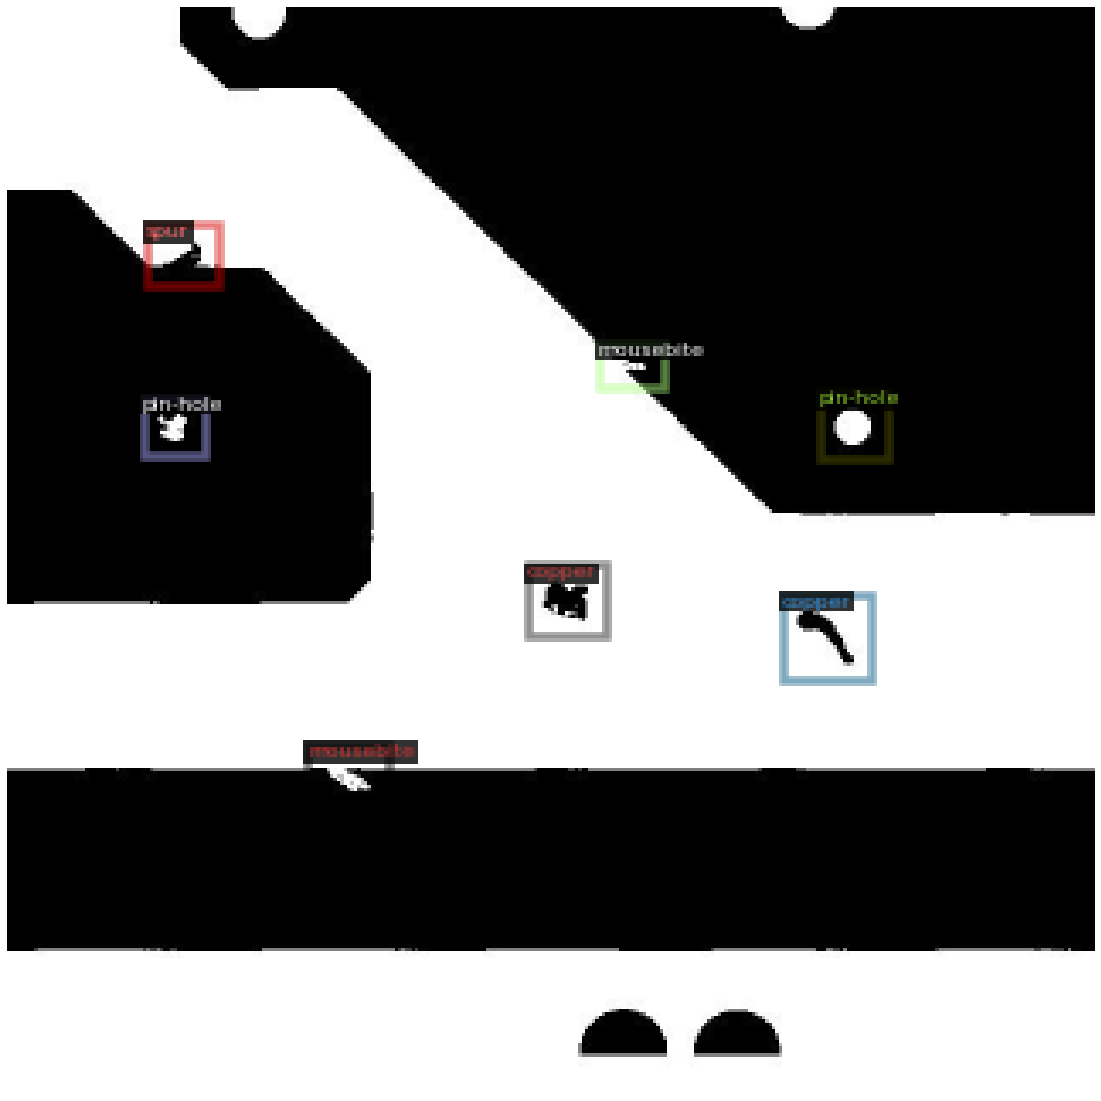

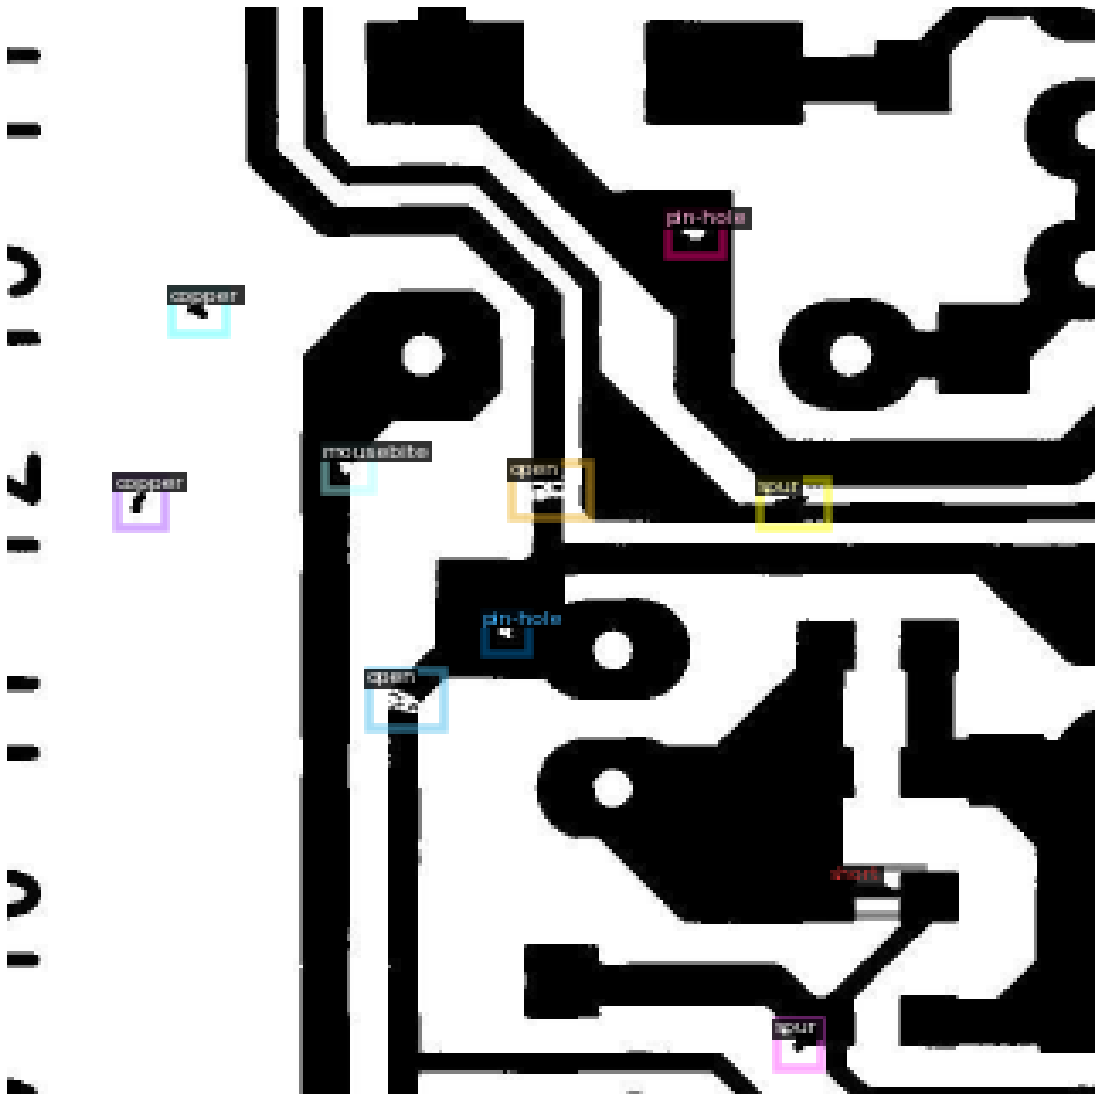

In [16]:
for d in random.sample(dataset_dicts, 2):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=PCB_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [28]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml"))
cfg.DATASETS.TRAIN = ("PCB_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 0
cfg.MODEL.WEIGHTS = "detectron2://COCO-Detection/faster_rcnn_R_50_FPN_1x/137257794/model_final_b275ba.pkl"  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 3000    # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 6 

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[01/14 08:04:28 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

'roi_heads.box_predictor.cls_score.weight' has shape (81, 1024) in the checkpoint but (7, 1024) in the model! Skipped.
'roi_heads.box_predictor.cls_score.bias' has shape (81,) in the checkpoint but (7,) in the model! Skipped.
'roi_heads.box_predictor.bbox_pred.weight' has shape (320, 1024) in the checkpoint but (24, 1024) in the model! Skipped.
'roi_heads.box_predictor.bbox_pred.bias' has shape (320,) in the checkpoint but (24,) in the model! Skipped.


[01/14 08:04:35 d2.engine.train_loop]: Starting training from iteration 0
[01/14 08:04:43 d2.utils.events]: eta: 0:19:57  iter: 19  total_loss: 2.425  loss_cls: 1.893  loss_box_reg: 0.068  loss_rpn_cls: 0.340  loss_rpn_loc: 0.144  time: 0.4047  data_time: 0.1471  lr: 0.000005  max_mem: 1988M
[01/14 08:04:51 d2.utils.events]: eta: 0:19:39  iter: 39  total_loss: 2.355  loss_cls: 1.742  loss_box_reg: 0.038  loss_rpn_cls: 0.381  loss_rpn_loc: 0.146  time: 0.3876  data_time: 0.1262  lr: 0.000010  max_mem: 1988M
[01/14 08:04:59 d2.utils.events]: eta: 0:19:30  iter: 59  total_loss: 1.960  loss_cls: 1.395  loss_box_reg: 0.046  loss_rpn_cls: 0.319  loss_rpn_loc: 0.158  time: 0.3898  data_time: 0.1445  lr: 0.000015  max_mem: 1988M
[01/14 08:05:06 d2.utils.events]: eta: 0:19:17  iter: 79  total_loss: 1.454  loss_cls: 0.972  loss_box_reg: 0.057  loss_rpn_cls: 0.280  loss_rpn_loc: 0.157  time: 0.3884  data_time: 0.1354  lr: 0.000020  max_mem: 1988M
[01/14 08:05:14 d2.utils.events]: eta: 0:19:10  it

OrderedDict()

In [29]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
cfg.DATASETS.TEST = ("PCB_test", )
predictor = DefaultPredictor(cfg)

In [30]:
from detectron2.utils.visualizer import ColorMode
dataset_dicts = get_PCB_dict(test)

tensor([4, 4, 3, 5, 0, 5, 2], device='cuda:0')


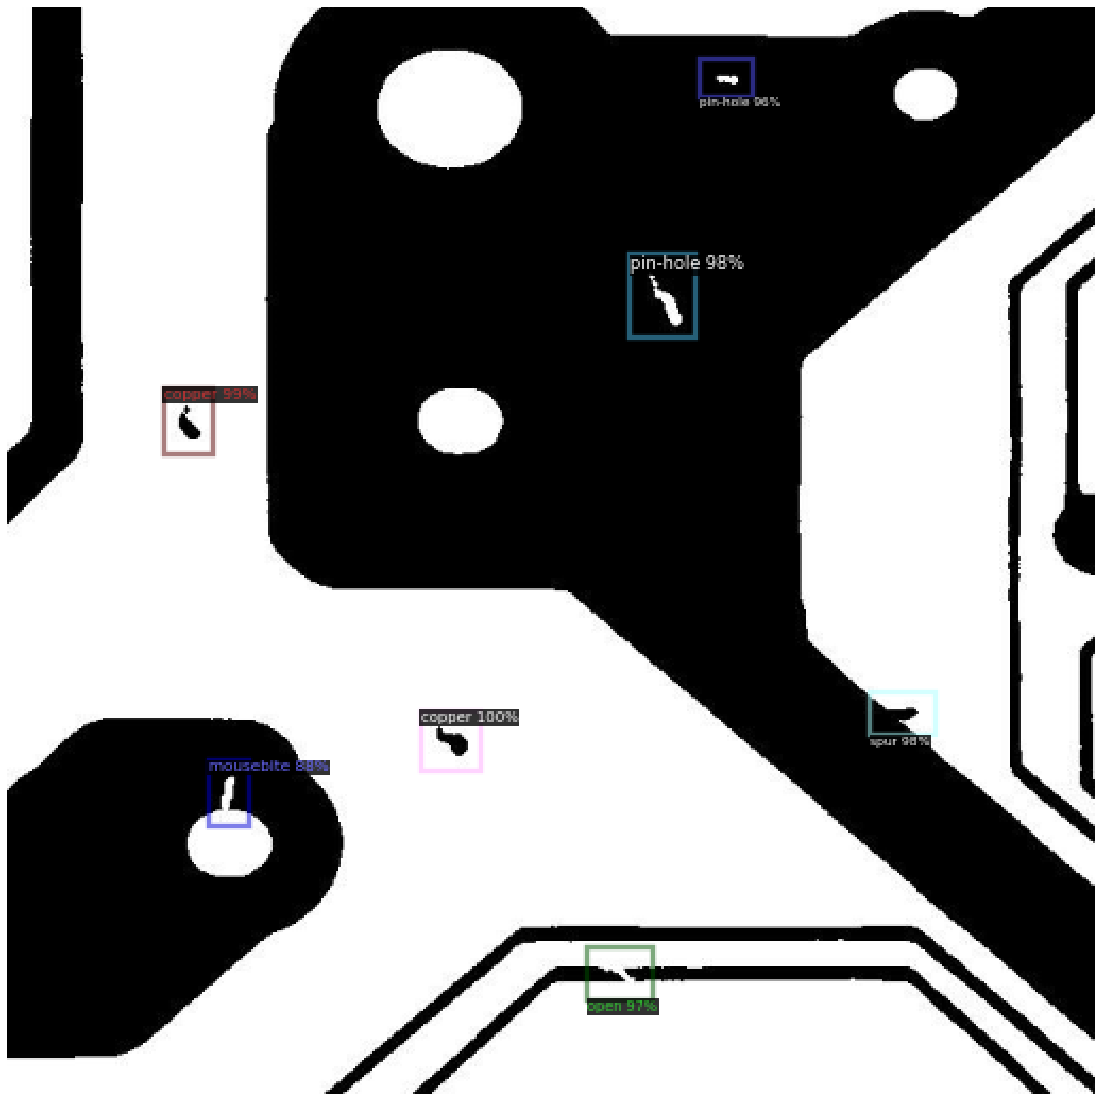

tensor([4, 5, 0, 3, 2, 2, 1, 1], device='cuda:0')


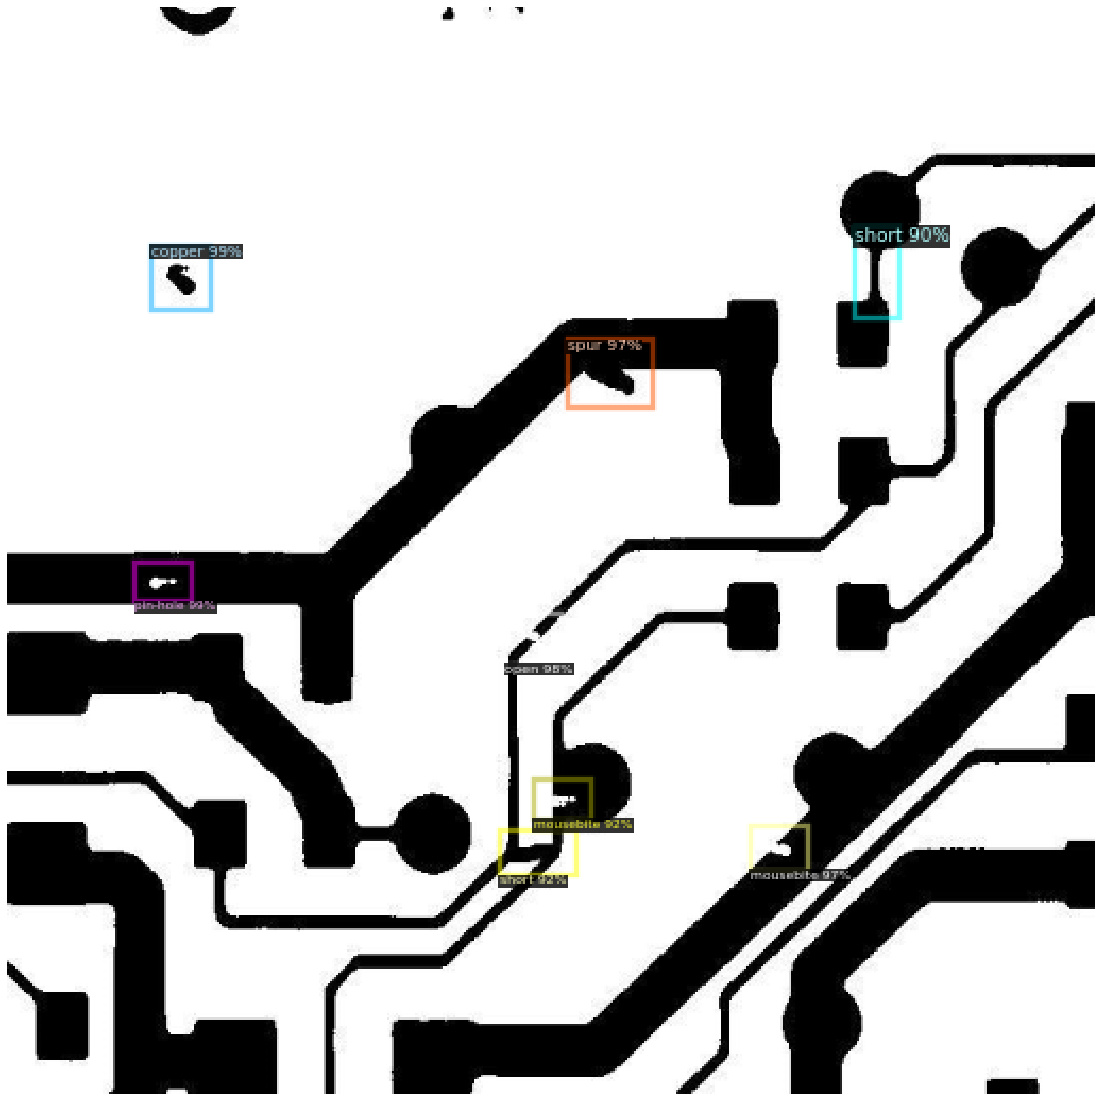

tensor([0, 4, 3, 0, 3, 0], device='cuda:0')


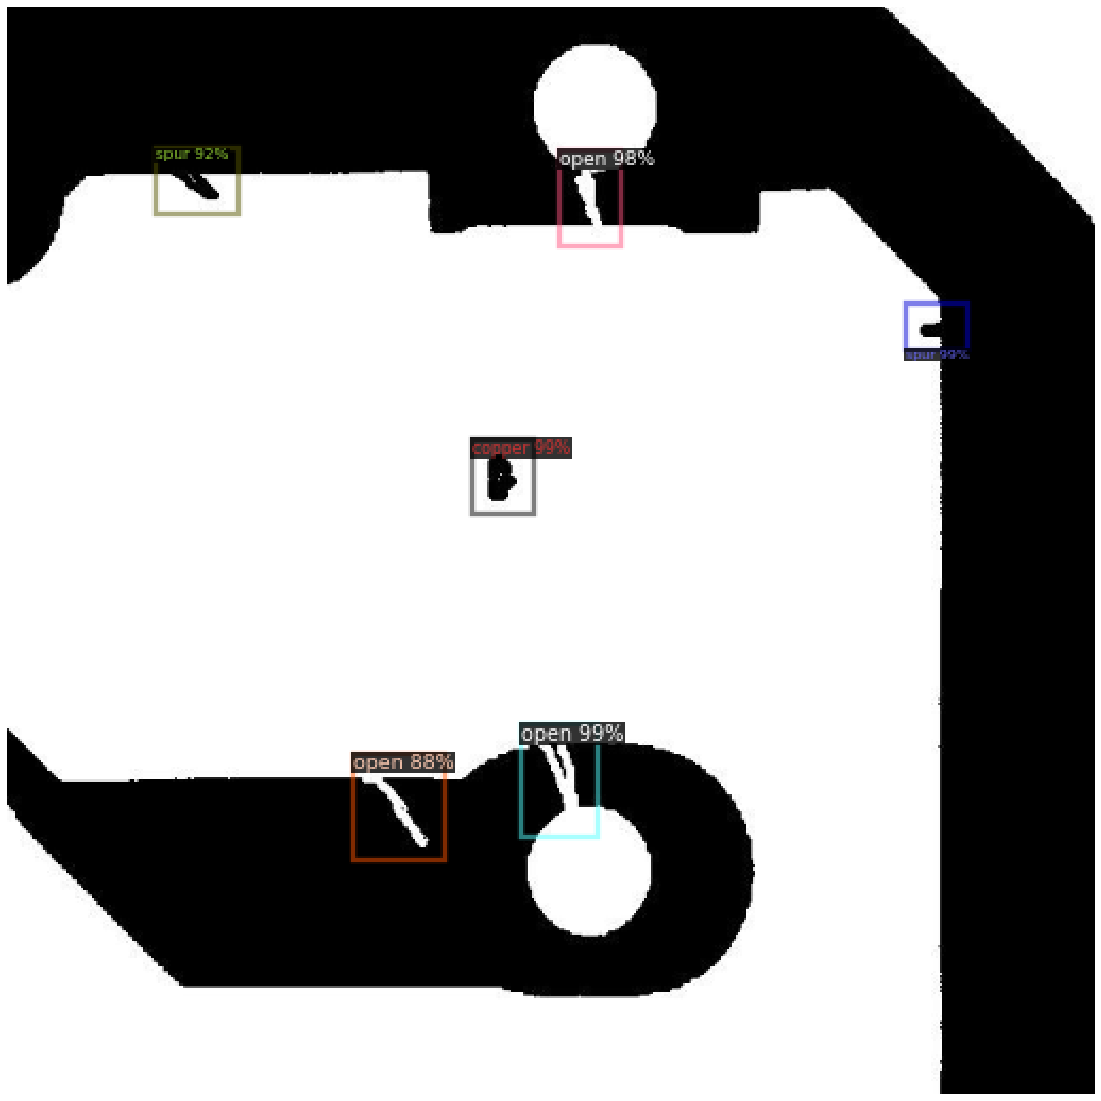

In [31]:
for d in random.sample(dataset_dicts, 3):
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=PCB_metadata, 
                   scale=0.8,
                   instance_mode =  ColorMode.IMAGE
        )
                   # remove the colors of unsegmented pixels
    print(outputs['instances'].pred_classes)

    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])